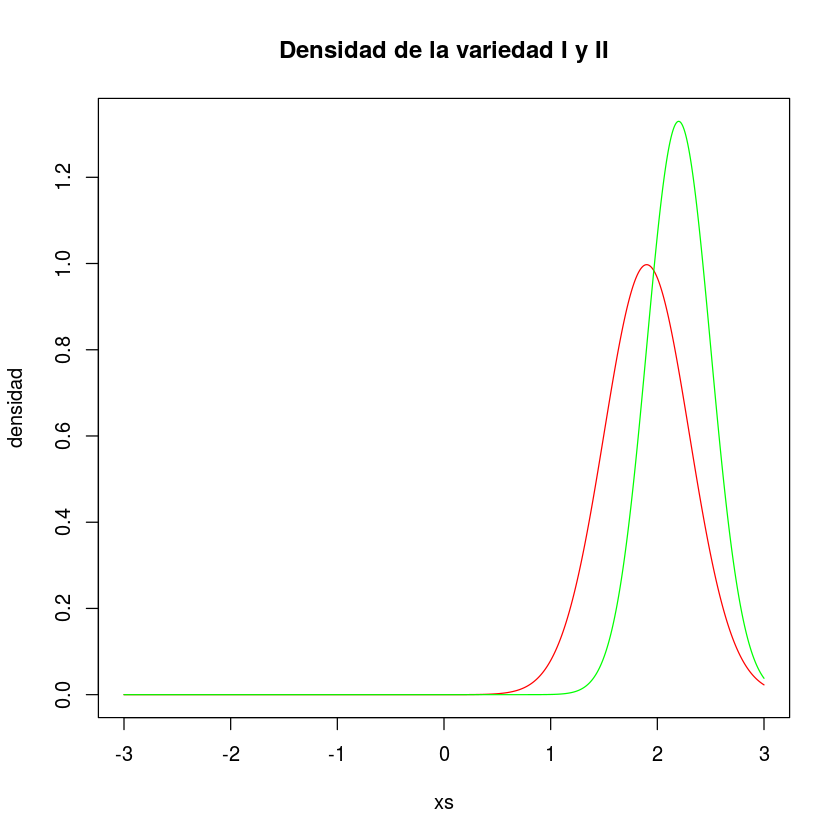

In [2]:
## Ej 1
xs = seq(-3, 3, length.out=1000)
ys_1 = dnorm(xs, 1.9, sqrt(0.16))
ys_2 = dnorm(xs, 2.2, sqrt(0.09))
plot(xs, ys_1, type='l', main='Densidad de la variedad I y II', col='red', ylim=c(0, max(c(ys_1, ys_2))),
     ylab='densidad')
lines(xs, ys_2, type='l', col='green')

In [3]:
## Ej 2
p = (1 - pnorm(2.1, 1.9, sqrt(0.16))) * 0.35 + (1 - pnorm(2.1, 2.2, sqrt(0.09))) * 0.65
print(p)
# Bug en solución cátedra

[1] 0.5178513


In [4]:
# Ej 3
p2 = (1 - pnorm(2.1, 1.9, sqrt(0.16))) * 0.35 / p
print(p2)
# Consultar

[1] 0.2085312


In [5]:
## Constantes
TIPO_1 = 1
TIPO_2 = 2
P_TIPO_1 = 0.35
P_TIPO_2 = 1 - P_TIPO_1
dt1 = function(t) { return(dnorm(t, 1.9, sqrt(0.16))) }
dt2 = function(t) { return(dnorm(t, 2.2, sqrt(0.09))) }

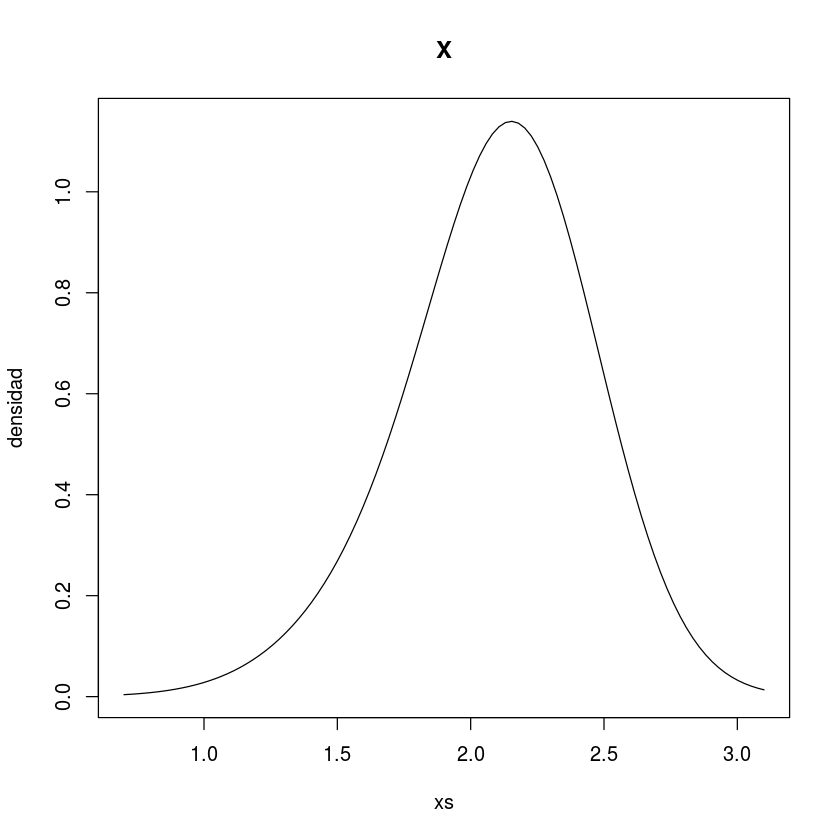

In [6]:
## Ej 4
dnicotinaX = function(t) dt1(t) * P_TIPO_1 + dt2(t) * P_TIPO_2
xs = seq(0.7, 3.1, length.out=100)
plot(xs, dnicotinaX(xs), type='l', ylab='densidad', main='X')

In [7]:
## Ej 5
rnicotinaX = function(n) {
    f = function(x) {
        if (runif(1) < P_TIPO_1) {
            return(rnorm(n, 1.9, sqrt(0.16)))
        } else {
            return(rnorm(n, 2.2, sqrt(0.09)))
        }
    }
    sapply(1:n, f)
}

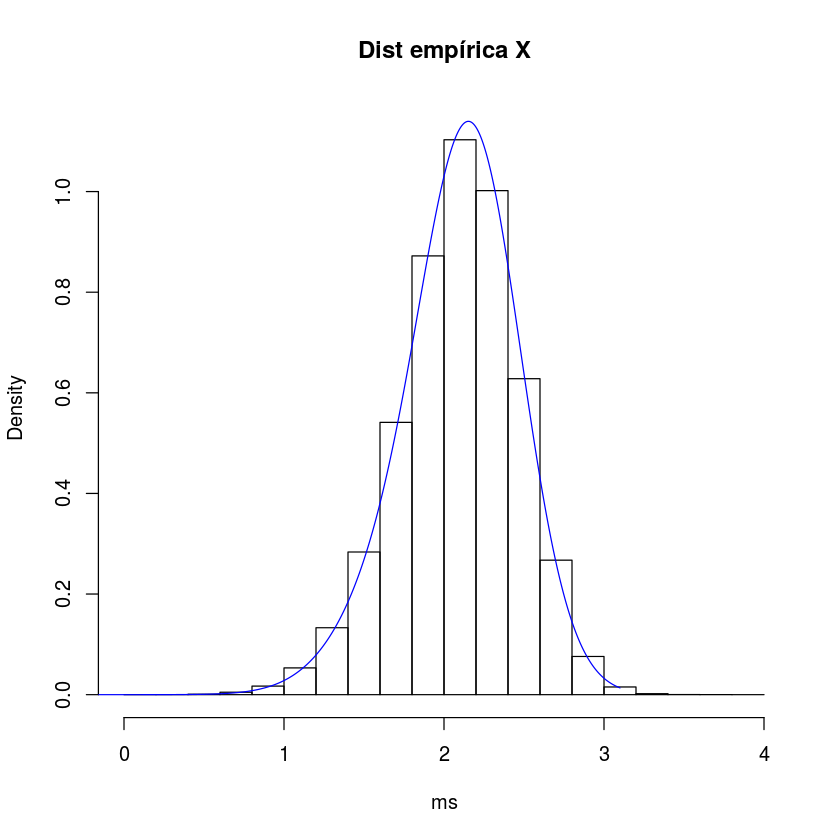

In [8]:
ms = rnicotinaX(1000)
xs = seq(-0.7, 3.1, length.out=1000)
dens = dnicotinaX(xs)
hist(ms, main='Dist empírica X', freq=F, ylim=c(0, max(dens)))
lines(xs, dens, col='blue')

In [9]:
## Ej 7
class.optim.variedad = function(nnicotina) {
    p_tipo_1 = dnorm(nnicotina, 1.9, sqrt(0.16)) * P_TIPO_1
    p_tipo_2 = dnorm(nnicotina, 2.2, sqrt(0.09)) * P_TIPO_2
    if (p_tipo_1 > p_tipo_2) {
        return(TIPO_1)
    } else {
        return(TIPO_2)
    }
}

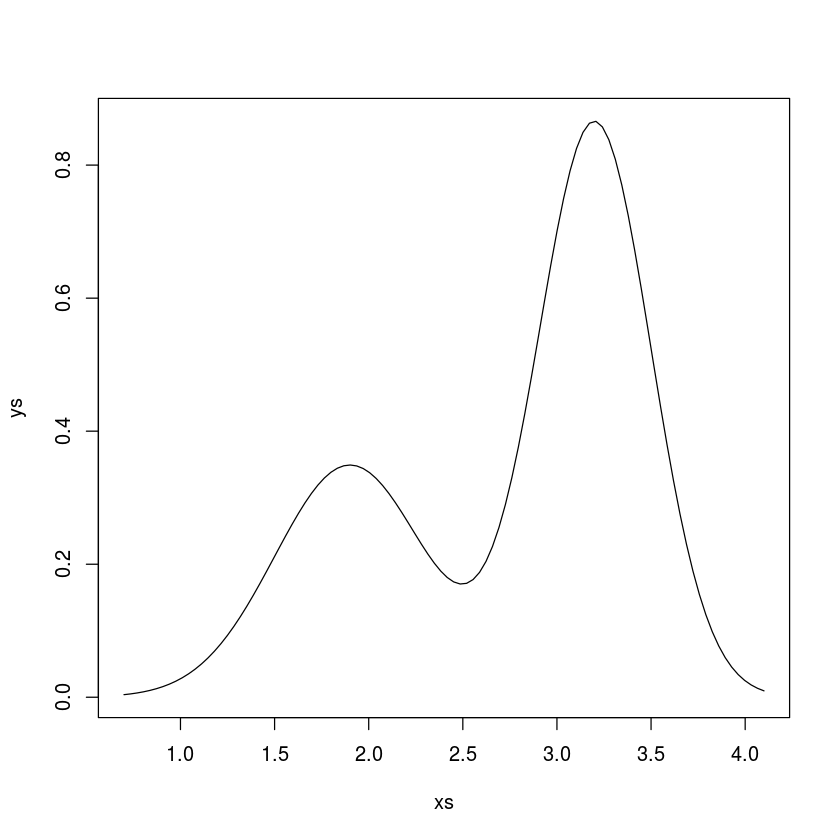

In [10]:
## Ej 8
xs = seq(0.7, 4.1, length=100)
ys = dnorm(xs, 1.9, sqrt(0.16)) * P_TIPO_1 + dnorm(xs, 3.2, sqrt(0.09)) * P_TIPO_2
plot(xs, ys, type='l')

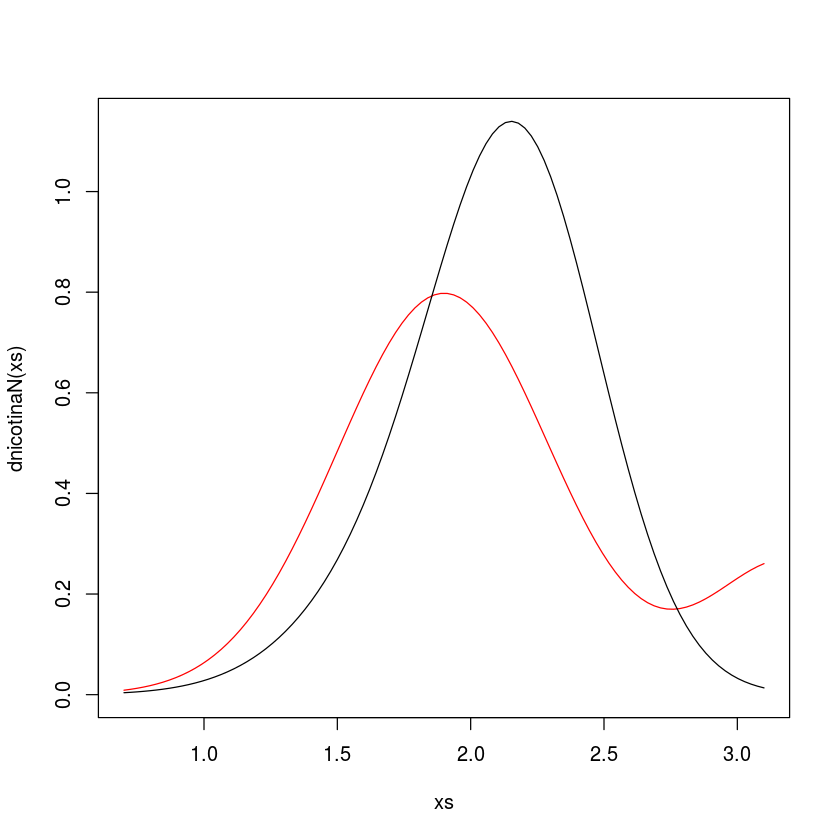

In [11]:
## Ej 10
gen <- function(pp, mus, sigmasqs) {
    function(t) {
            acum = 0
            for (i in 1:length(pp)) {
                acum = acum + pp[i] * dnorm(t, mus[i], sqrt(sigmasqs[i]))
            }
            return(acum)
        }
}
dnicotinaX <- gen(c(0.35, 0.65), c(1.9, 2.2), c(0.16, 0.09))
dnicotinaN <- gen(c(0.8, 0.2), c(1.9, 3.2), c(0.16, 0.09))


xs = seq(0.7, 3.1, length=100)
ymax = max(c(dnicotinaN(xs), dnicotinaX(xs)))
plot(xs, dnicotinaN(xs), type='l', col='red', ylim=c(0, ymax))
lines(xs, dnicotinaX(xs), type='l', col='black')

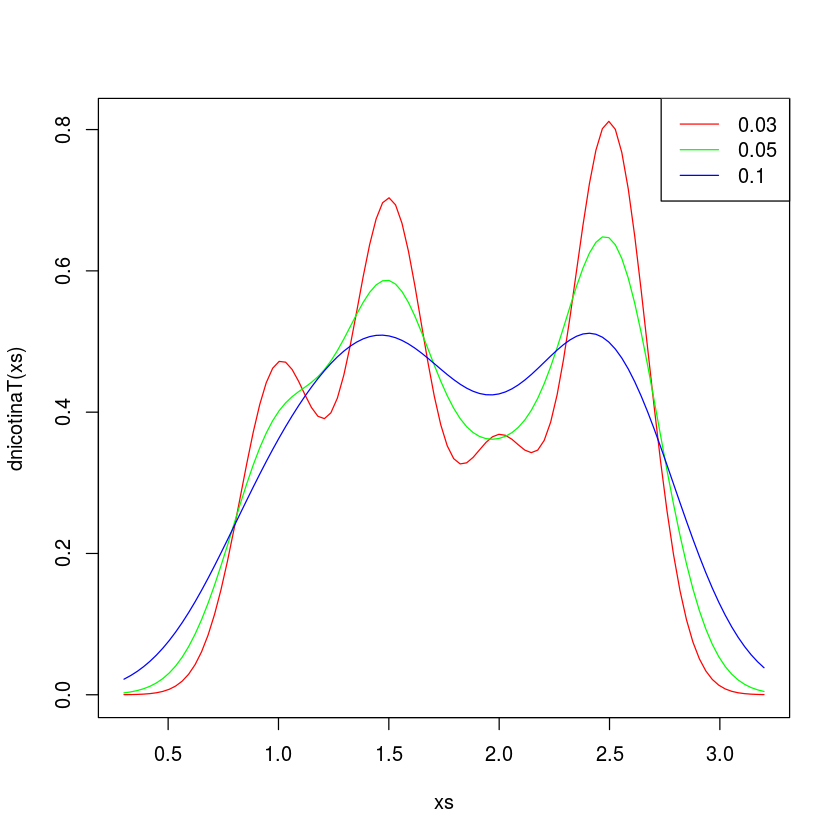

In [12]:
## Ej 11
sdd = c(0.03, 0.05, 0.1)
xs = seq(0.3, 3.2, length=100)
cols = c('red', 'green', 'blue', 'purple')
for (i in 1:length(sdd)) {
    sd = sdd[i]
    color = cols[i]
    dnicotinaT = gen(c(0.2, 0.3, 0.15, 0.35), c(1, 1.5, 2, 2.5), rep(sd, 4))
    if (i == 1) {
        plot(xs, dnicotinaT(xs), type='l', col=color)
    } else {
        lines(xs, dnicotinaT(xs), type='l', col=color)
    }
}
legend('topright', legend=sdd, lty=rep(1, length(sdd)), lwd=rep(1, length(sdd)), col=cols)

In [13]:
ndata <- read.table('datos_lista_4.txt')
dds = c(gen(c(0.35, 0.65), c(1.9, 2.2), c(0.16, 0.09)), # X
        gen(c(0.35, 0.65), c(1.9, 3.2), c(0.16, 0.09)), # W
        gen(c(0.8, 0.2), c(1.9, 3.2), c(0.16, 0.09)), # N
        gen(c(0.2, 0.3, 0.15, 0.35), c(1, 1.5, 2, 2.5), rep(0.05, 4)) # T
       ) 
probs = matrix(nrow=4, ncol=4)
probs = data.frame(probs)
rownames(probs) = c('X', 'W', 'N', 'T')
for (i in 1:4) {
    for (c in 2:5) {
        probs[i, c-1] = sum(dds[[i]](ndata[,c]))
    }
}
for (n in 1:4) {
    print(c(n, rownames(probs)[which.max(probs[,n])]), sep='')
}

[1] "1" "X"
[1] "2" "X"
[1] "3" "X"
[1] "4" "X"
